# **Linear Regression Without Outliers**

### Aim :
 To predict the pricing of houses in Melbourne   using regression model


### Objective :
1. To analyse the influence of outliers on the price prediction
2. To check if model is overfit or not
3. If the model is overfit implement regularisation models Lasso and Ridge
4. And check the model perfromance after this

### Dataset : Melbourne housing dataset

### Source : Kaggle

In [ ]:
# Importing all the required packages and modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
data=pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
# Function to fill missing data for our numeric columns using mean
def fillmissing(data):
  import math
  d=math.floor(data.mean())
  data.fillna(d,inplace=True)
  data = data.astype(int)
  print(data.isnull().sum())

In [ ]:
# Function to fill missing data for our categorical columns using mode
def fillmissing2(data):
  d=data.mode()[0]
  data.fillna(d,inplace=True)
  print(data.isnull().sum())

In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
lst=['Rooms','Price',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude','Propertycount']

In [ ]:
lst1=['Suburb', 'Address','Type','Method', 'SellerG',
       'Date','CouncilArea','Regionname']

In [ ]:
for i in lst1:
  fillmissing2(data[i])

0
0
0
0
0
0
0
0


In [ ]:
for i in lst:
  fillmissing(data[i])

0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
# Correlation of our target variable price with other independent variables
data[data.columns[1:]].corr()["Price"][:]

Rooms            0.404908
Price            1.000000
Distance        -0.186847
Postcode         0.040511
Bedroom2         0.331350
Bathroom         0.337517
Car              0.176054
Landsize         0.026469
BuildingArea     0.065321
YearBuilt       -0.200594
Lattitude       -0.049739
Longtitude       0.155606
Propertycount   -0.052934
Name: Price, dtype: float64

In [ ]:
# We don't consider the columns Postcode,Landsize,BuildingArea,Lattitude,Propertycount
# as they have low correlation wrt to price.

In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
df=data[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance','Bedroom2', 'Bathroom', 'Car','YearBuilt', 'CouncilArea',
       'Longtitude', 'Regionname']]
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,YearBuilt,CouncilArea,Longtitude,Regionname
0,Abbotsford,68 Studley St,2,h,1050173.0,SS,Jellis,3/09/2016,2.5,2.0,1.0,1.0,1965.0,Yarra City Council,144.99580,Northern Metropolitan
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,1965.0,Yarra City Council,144.99840,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,1900.0,Yarra City Council,144.99340,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,u,1050173.0,VB,Rounds,4/02/2016,2.5,3.0,2.0,1.0,1965.0,Yarra City Council,145.01160,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,1900.0,Yarra City Council,144.99440,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,4.0,1.0,3.0,1965.0,Maribyrnong City Council,144.88467,Western Metropolitan
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,2.0,2.0,1.0,2018.0,Maribyrnong City Council,144.88826,Western Metropolitan
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,2.0,1.0,2.0,2000.0,Maribyrnong City Council,144.87856,Western Metropolitan
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3.0,1.0,1.0,1965.0,Maribyrnong City Council,145.00000,Western Metropolitan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       34857 non-null  object 
 1   Address      34857 non-null  object 
 2   Rooms        34857 non-null  int64  
 3   Type         34857 non-null  object 
 4   Price        34857 non-null  float64
 5   Method       34857 non-null  object 
 6   SellerG      34857 non-null  object 
 7   Date         34857 non-null  object 
 8   Distance     34857 non-null  float64
 9   Bedroom2     34857 non-null  float64
 10  Bathroom     34857 non-null  float64
 11  Car          34857 non-null  float64
 12  YearBuilt    34857 non-null  float64
 13  CouncilArea  34857 non-null  object 
 14  Longtitude   34857 non-null  float64
 15  Regionname   34857 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 4.3+ MB


In [ ]:
dfc=['Rooms','Price','Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt',
      'Longtitude']

In [ ]:
for i in dfc:
  df[i]=df[i].astype(int)


In [ ]:
df.dtypes

Suburb         object
Address        object
Rooms           int64
Type           object
Price           int64
Method         object
SellerG        object
Date           object
Distance        int64
Bedroom2        int64
Bathroom        int64
Car             int64
YearBuilt       int64
CouncilArea    object
Longtitude      int64
Regionname     object
dtype: object

In [ ]:
# Function to check for outliers and finding the upper and lower bound
# using quartiles method
def outliers(data):
    sns.boxplot(data)
    plt.show()
    import math
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper = math.floor(q3 + 1.5*iqr)
    lower = math.floor(q1 - 1.5*iqr)
    return (upper,lower)

In [ ]:
# Function to remove the outliers by using capping method
data1=df.copy()
def remove_outliers(data,upper,lower):
    data1 = (np.where(data1>=upper,upper,data1))
    data1 = (np.where(data1<= lower,lower,data1))
    sns.boxplot(data1)
    plt.show()


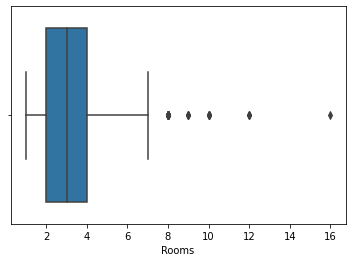

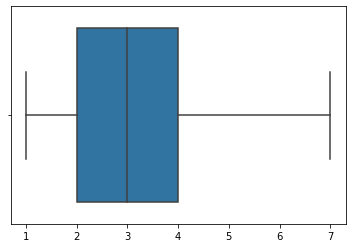

*****************


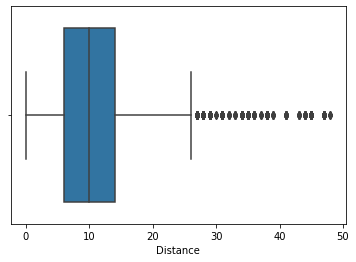

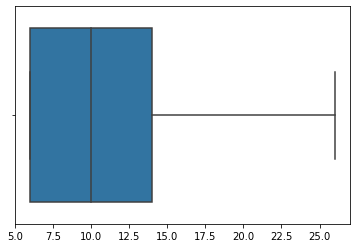

*****************


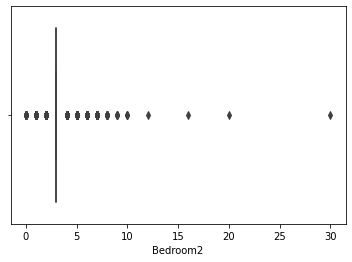

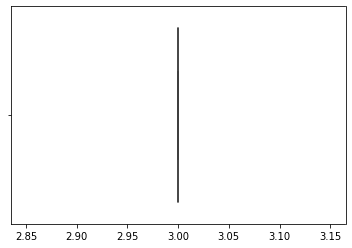

*****************


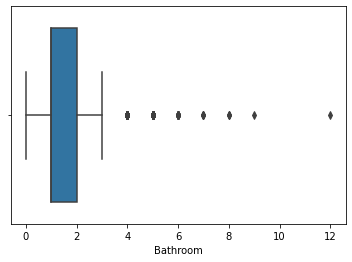

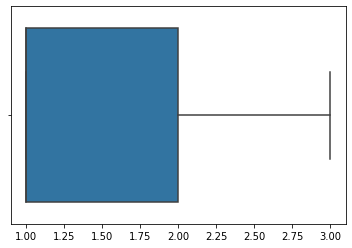

*****************


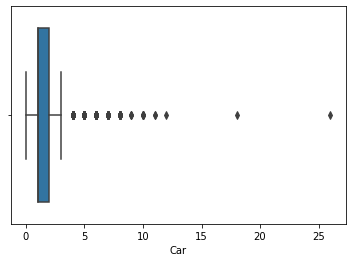

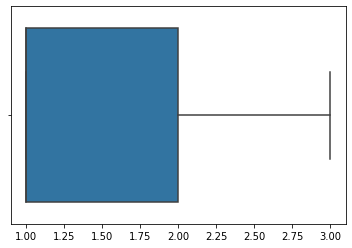

*****************


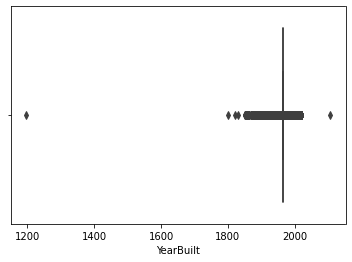

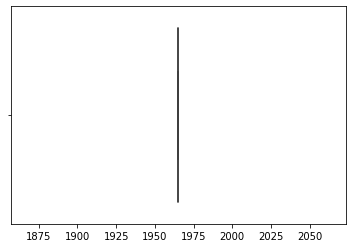

*****************


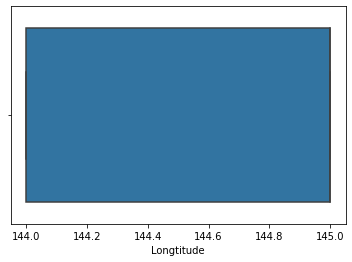

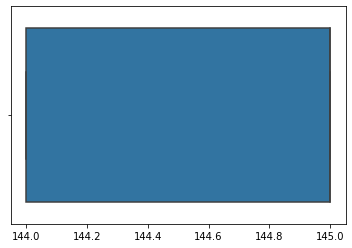

*****************


In [ ]:
dfc=['Rooms','Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt',
      'Longtitude']
for i in dfc:
  a=outliers(df[i])
  u=a[0]
  l=abs(a[1])
  remove_outliers(df[i],u,l)
  print("*****************")

In [ ]:
# Function to find outliers using Z score method
def outliers1(data):
    sns.boxplot(data)
    plt.show()
    import math
    u1=data.mean() + 3*data.std()
    l1= data.mean() - 3*data.std()
    u = math.floor(u1)
    l=math.floor(l1)
    return (u,l)

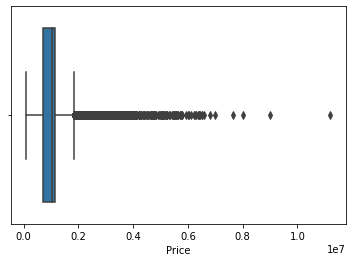

In [ ]:
u,l=outliers1(df["Price"])

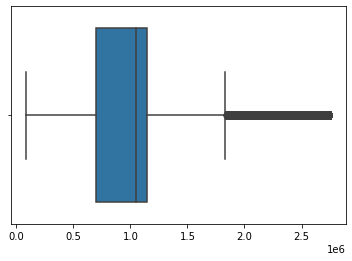

In [ ]:
remove_outliers(df["Price"],u,l)

Countplot of Rooms


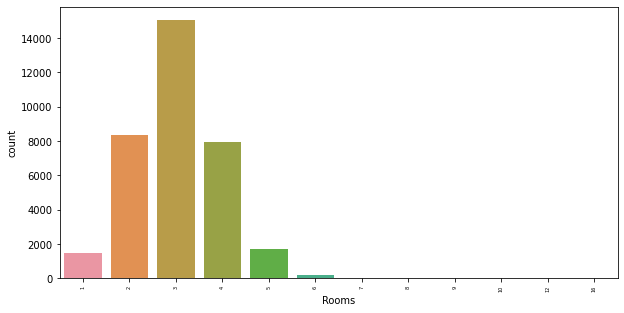

****************
Countplot of Distance


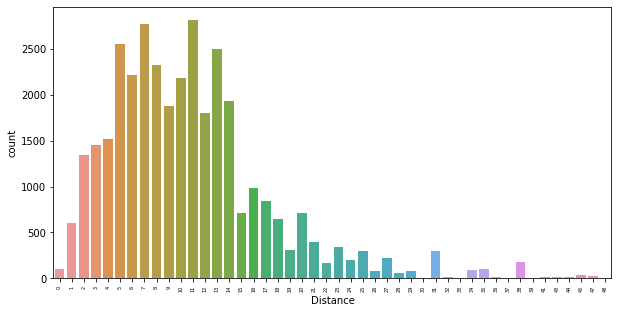

****************
Countplot of Bedroom2


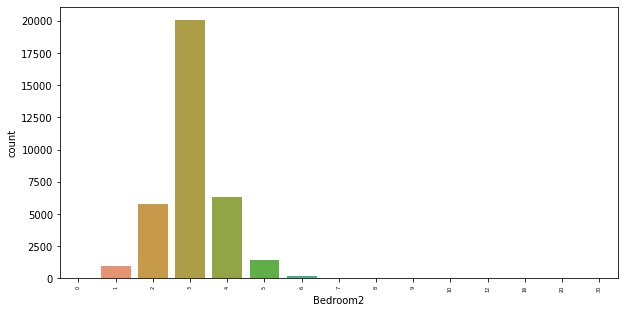

****************
Countplot of Bathroom


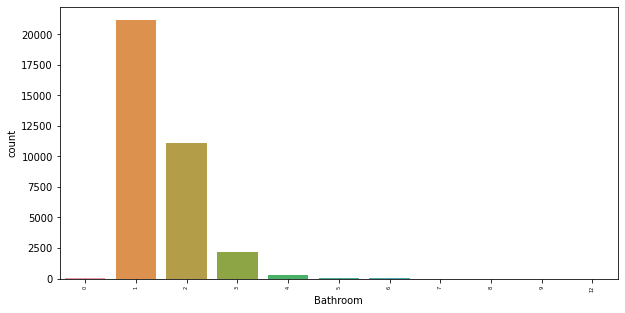

****************
Countplot of Car


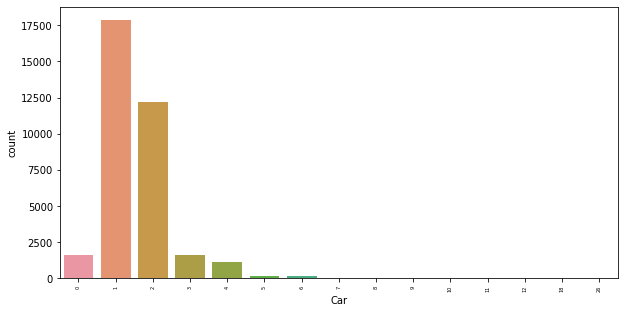

****************
Countplot of Longtitude


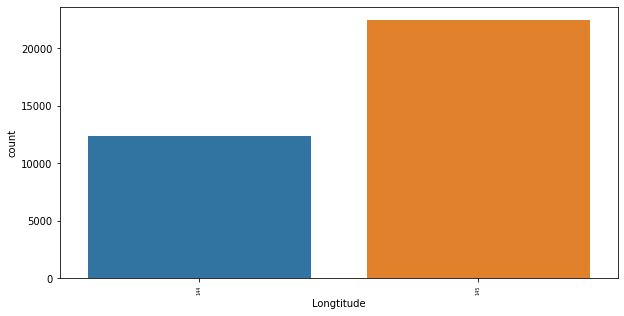

****************


In [ ]:
dfc1=['Rooms','Distance', 'Bedroom2', 'Bathroom', 'Car',
      'Longtitude']
for i in dfc1:

  print("Countplot of",i)
  plt.figure(figsize=(10,5))
  sns.countplot(df[i])

  plt.xticks(fontsize=5, rotation=90)
  plt.show()
  print("****************")

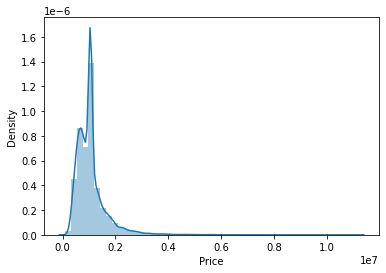

In [ ]:
sns.distplot(df["Price"],kde=True)

In [ ]:
# Selecting our required features
features=['Rooms','Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt',
      'Longtitude']
x=data1.loc[:,features]
y=data1.loc[:,'Price']

In [ ]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30)


The RMSE Value for train dataset is 471919.72

The RMSE Value for test dataset is 445207.32

R square :  0.34


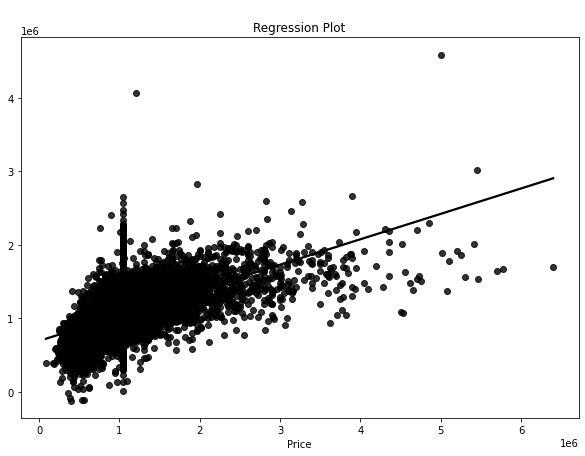

In [ ]:
# Fitting of regression model
reg=LinearRegression(fit_intercept=True,normalize=True)
r=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
r_pred_train=(reg.predict(X_train))
print("\nThe RMSE Value for train dataset is",round(np.sqrt(
    mean_squared_error(y_train,r_pred_train)),2))
print("\nThe RMSE Value for test dataset is",round(np.sqrt(
    mean_squared_error(y_test,y_pred)),2))
print("\nR square : ",round(r2_score(y_test,y_pred),2))
plt.figure(figsize=(10,7))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='black')
plt.title("\nRegression Plot")
plt.show()

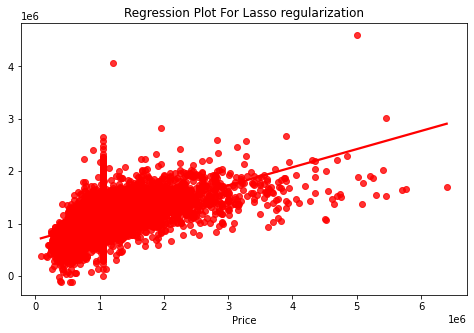


R square :  0.34


In [ ]:
# Using Lasso regularization
l=Lasso(alpha=0.03)
l.fit(X_train, y_train)
l_pred_train=l.predict(X_train)
l_pred=l.predict(X_test)
plt.figure(figsize=(8,5))
plt.title("Regression Plot For Lasso regularization")
sns.regplot(x=y_test,y=l_pred,ci=None,color ='red')
plt.show()

print("\nR square : ",round(r2_score(y_test,l_pred),2))

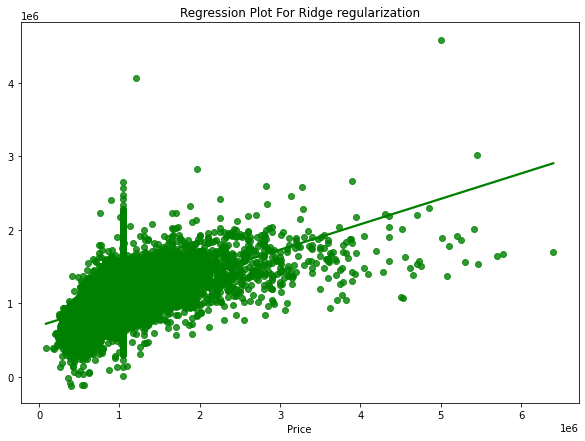


R square :  0.34


In [ ]:
# Using Ridge regularization
m=Ridge(alpha=0.01)
m.fit(X_train , y_train)
m_pred_train=m.predict(X_train)
m_pred=m.predict(X_test)
plt.figure(figsize=(10,7))
plt.title("Regression Plot For Ridge regularization")
sns.regplot(x=y_test,y=m_pred,ci=None,color ='green')
plt.show()

print("\nR square : ",round(r2_score(y_test,m_pred),2))

# Conclusion

### We see that the difference in our model's train and test error is minimum therefore our model is balanced.
### Since our linear regression model is balanced therefore there is no difference in score for our model after Lasso and ridge regularizations.
### We also observe that the R square is 0.34 that is our model expalin only 34% of variability of our target variable.
### Compared to our model with outliers our model without outliers has better r square but even 0.34 is very little so we might have to further optimize our model by better feature slection or using different model like SVM and check the accuracy.